In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import re
from sklearn.preprocessing import MultiLabelBinarizer, LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [2]:
listings = pd.read_csv('data/listings.csv')

In [3]:
print('shape: ',listings.shape)
print('columns: ',listings.columns.values)

shape:  (59824, 29)
columns:  ['accommodates' 'amenities' 'availability_30' 'bathrooms' 'bed_type'
 'bedrooms' 'beds' 'cancellation_policy' 'city' 'has_availability'
 'host_id' 'id' 'instant_bookable' 'latitude' 'longitude' 'metropolitan'
 'name' 'price' 'property_type' 'review_scores_checkin'
 'review_scores_cleanliness' 'review_scores_communication'
 'review_scores_location' 'review_scores_rating' 'review_scores_value'
 'room_type' 'state' 'weekly_price' 'zipcode']


In [4]:
listings.head(5)

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,119445,7949480,f,40.852054,-73.788680,NYC,City Island Sanctuary relaxing BR & Bath w Par...,$99.00,House,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,9117975,16042478,t,40.853491,-73.788607,NYC,WATERFRONT STUDIO APARTMENT,$200.00,Apartment,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,9815788,1886820,f,40.841144,-73.783052,NYC,Quaint City Island Community.,$300.00,House,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,13886510,6627449,f,40.849775,-73.786609,NYC,Large 1 BDRM in Great location,$125.00,Apartment,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,$775.00,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,28811542,5557381,t,40.850024,-73.789328,NYC,Quaint City Island Home,$69.00,House,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,$350.00,10464


In [5]:
print('missing values ratio (in %): ')
print(100*listings.isnull().sum()/listings.shape[0])

missing values ratio (in %): 
accommodates                     0.101966
amenities                        0.000000
availability_30                  0.000000
bathrooms                        0.337657
bed_type                         0.000000
bedrooms                         0.158799
beds                             0.182201
cancellation_policy              0.000000
city                             0.076892
has_availability               100.000000
host_id                          0.000000
id                               0.000000
instant_bookable                 0.000000
latitude                         0.000000
longitude                        0.000000
metropolitan                     0.000000
name                             0.068534
price                            0.000000
property_type                    0.006686
review_scores_checkin           23.980342
review_scores_cleanliness       23.870019
review_scores_communication     23.878377
review_scores_location          23.985357
revi

In [6]:
print('amenities')
amenities_list = listings['amenities'].apply(lambda x: re.sub('[{}"]', '', x).split(','))
mlb_amenities = MultiLabelBinarizer()
amenities_binarized = mlb_amenities.fit_transform(amenities_list)
listings['amenities: '+mlb_amenities.classes_] = pd.DataFrame(amenities_binarized)

to_binarize = ['bed_type','cancellation_policy','metropolitan','room_type','state']

for i in to_binarize:
    print(i)
    lb = LabelBinarizer()
    binarized = lb.fit_transform(listings[i])
    listings[i+': '+lb.classes_.astype(object)] = pd.DataFrame(binarized)

to_binarize_with_nan = ['property_type','city']
for i in to_binarize_with_nan:
    print(i)
    lb = LabelBinarizer()
    binarized = lb.fit_transform(listings[i].apply(lambda x: str(x)))
    listings[i+': '+lb.classes_.astype(object)] = pd.DataFrame(binarized)
    del listings[i+': '+'nan']

print('instant_bookable')
lb = LabelBinarizer()
binarized = lb.fit_transform(listings['instant_bookable'])
listings['instant_bookable: t'] = pd.DataFrame(binarized)

amenities
bed_type
cancellation_policy
metropolitan
room_type
state
property_type
city
instant_bookable


In [7]:
listings['price'] = listings['price'].apply(lambda x: float(re.sub('[,]','',x[1:])))

<h2> Visualization </h2>

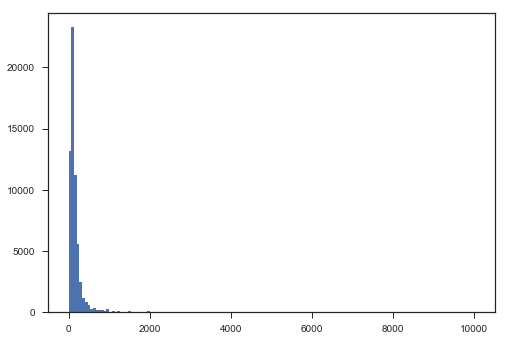

In [8]:
plt.hist(listings['price'],bins=150)
plt.show()


In [15]:
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,host_id,id,instant_bookable,latitude,longitude,metropolitan,name,price,property_type,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode,amenities:,amenities: 24-Hour Check-in,amenities: 24-hour check-in,amenities: Accessible-height bed,amenities: Accessible-height toilet,amenities: Air Conditioning,amenities: Air conditioning,amenities: BBQ grill,amenities: Baby bath,amenities: Baby monitor,amenities: Babysitter recommendations,amenities: Bathtub,amenities: Beach essentials,amenities: Bed linens,amenities: Breakfast,amenities: Buzzer/Wireless Intercom,amenities: Buzzer/wireless intercom,amenities: Cable TV,amenities: Carbon Monoxide Detector,amenities: Carbon monoxide detector,amenities: Cat(s),amenities: Changing table,amenities: Children’s books and toys,amenities: Children’s dinnerware,amenities: Cleaning before checkout,amenities: Coffee maker,amenities: Cooking basics,amenities: Crib,amenities: Disabled parking spot,amenities: Dishes and silverware,amenities: Dishwasher,amenities: Dog(s),amenities: Doorman,amenities: Doorman Entry,amenities: Dryer,amenities: EV charger,amenities: Elevator in Building,amenities: Elevator in building,amenities: Essentials,amenities: Ethernet connection,amenities: Extra pillows and blankets,amenities: Family/Kid Friendly,amenities: Family/kid friendly,amenities: Fire Extinguisher,amenities: Fire extinguisher,amenities: Fireplace guards,amenities: Firm matress,amenities: First Aid Kit,amenities: First aid kit,amenities: Flat smooth pathway to front door,amenities: Free Parking on Premises,amenities: Free Parking on Street,amenities: Free parking on premises,amenities: Free parking on street,amenities: Game console,amenities: Garden or backyard,amenities: Grab-rails for shower and toilet,amenities: Gym,amenities: Hair Dryer,amenities: Hair dryer,amenities: Hangers,amenities: Heating,amenities: High chair,amenities: Hot Tub,amenities: Hot tub,amenities: Hot water,amenities: Indoor Fireplace,amenities: Indoor fireplace,amenities: Internet,amenities: Iron,amenities: Keypad,amenities: Kitchen,amenities: Laptop Friendly Workspace,amenities: Laptop friendly workspace,amenities: Lock on Bedroom Door,amenities: Lock on bedroom door,amenities: Lockbox,amenities: Long term stays allowed,amenities: Luggage dropoff allowed,amenities: Microwave,amenities: Other pet(s),amenities: Outlet covers,amenities: Oven,amenities: Pack ’n Play/travel crib,amenities: Paid Parking Off Premises,amenities: Paid parking off premises,amenities: Path to entrance lit at night,amenities: Patio or balcony,amenities: Pets Allowed,amenities: Pets allowed,amenities: Pets live on this property,amenities: Pocket wifi,amenities: Pool,amenities: Private bathroom,amenities: Private entrance,amenities: Private living room,amenities: Refrigerator,amenities: Room-darkening shades,amenities: Safety Card,amenities: Safety card,amenities: Self Check-In,amenities: Shampoo,amenities: Single level home,amenities: Smartlock,amenities: Smoke Detector,amenities: Smoke detector,amenities: Smoking Allowed,amenities: Smoking allowed,amenities: Stair gates,amenities: Step-free access,amenities: Stove,amenities: Suitable for Events,amenities: Suitable for events,amenities: TV,amenities: Table corner guards,amenities: Washer,amenities: Washer / Dryer,amenities: Wheelchair Accessible,amenities: Wheelchair accessible,amenities: Wide clearance to bed,amenities: Wide clearance to shower and toilet,amenities: Wide doorway,amenities: Wide hallway clearance,amenities: Window guards,amenities: Wireless Internet,amenities: translation missing: en.hosting_amenity_49,amenities: translation missing: en.hosting_amenity_50,bed_type: Airbed,bed_type: Couch,bed_type: Futon,bed_type: Pull-out Sofa,bed_type: Real Bed,cancellation_poli

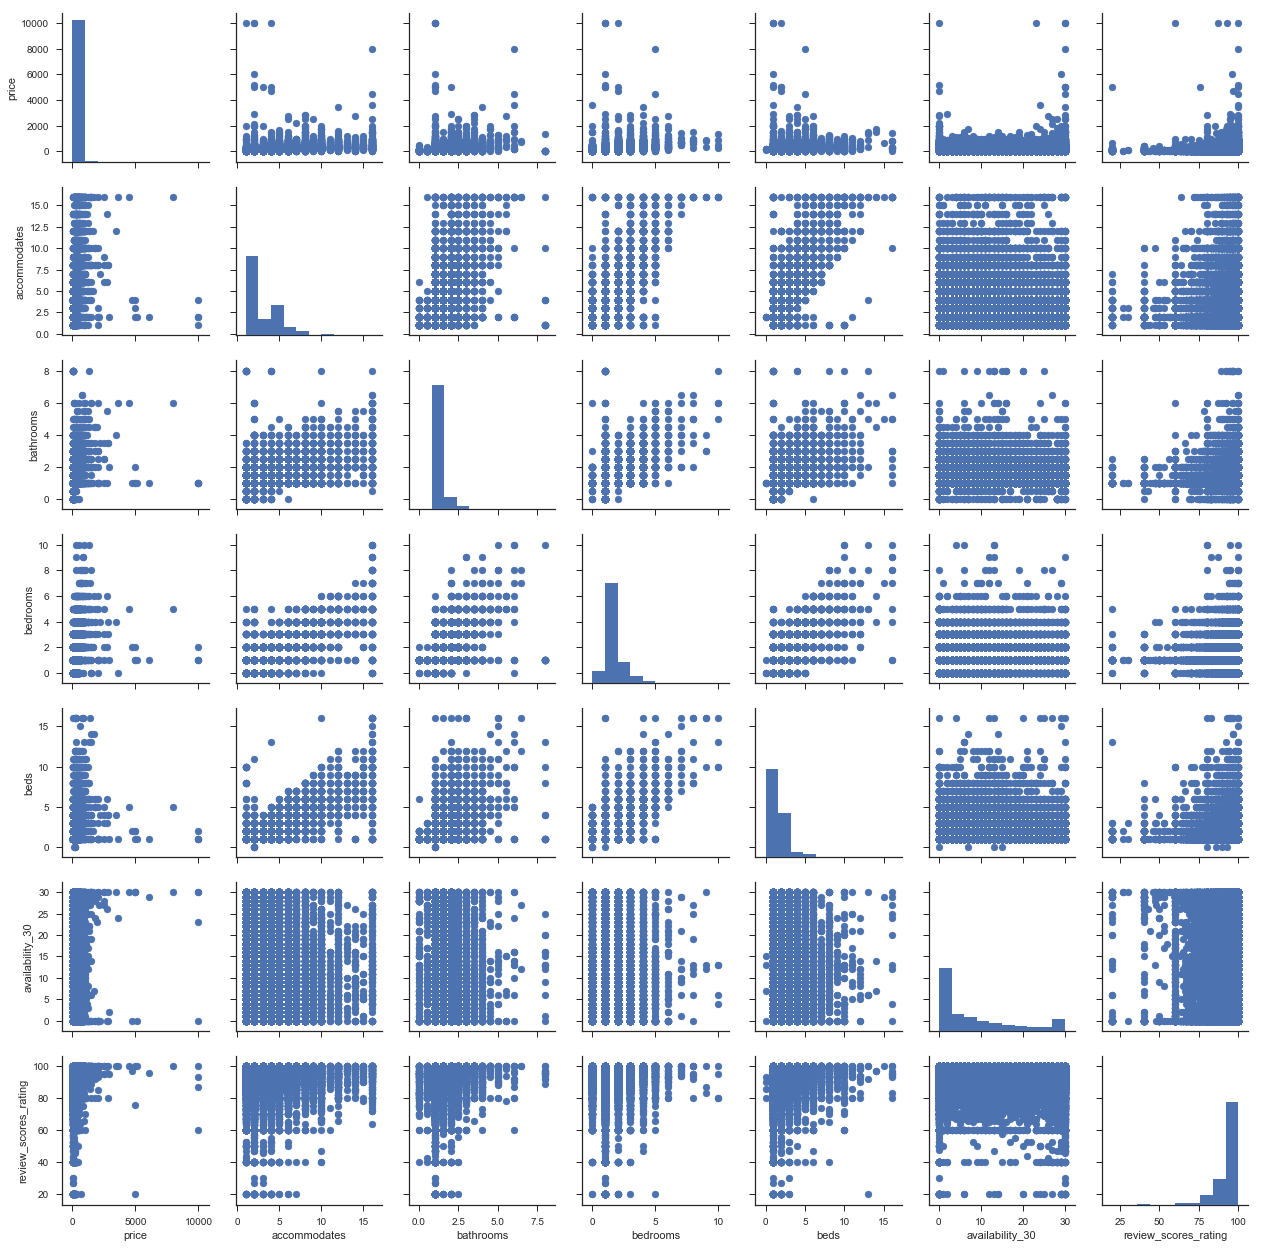

In [14]:
g = sns.PairGrid(listings[['price','accommodates','bathrooms','bedrooms','beds','availability_30','review_scores_rating']].dropna())
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
plt.show()

In [ ]:
#We are deleting columns that have been binarized or that we won't use
to_delete = ['amenities','bed_type','cancellation_policy','metropolitan','room_type','state',
           'property_type','city','instant_bookable','has_availability','host_id','id','name',
             'latitude','longitude','weekly_price']

for i in to_delete:
    del listings[i]